In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits


In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [5]:
#Las imagenes de los digitos se encuentran representadas en una matriz unidimensional
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

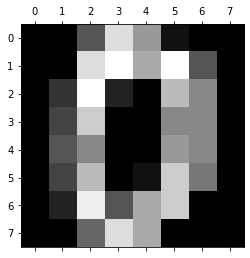

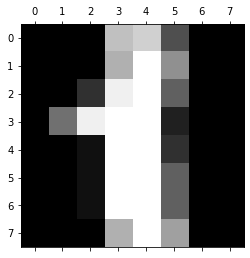

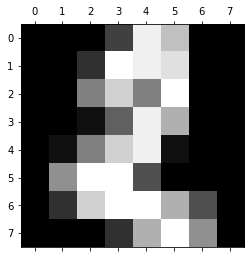

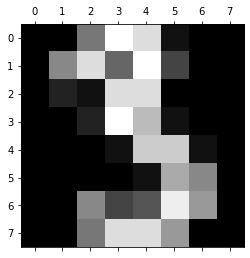

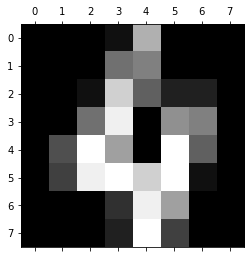

In [6]:
#Si usamos matplotlib podremos representarlas por medio de una imagen 
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [15]:
## ENTRENAMOS EL MODELO 
from sklearn.model_selection import train_test_split
X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [20]:
## CARGAMOS EL MODELO 
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(solver='lbfgs',max_iter=1000)

In [22]:
## ENRENAMOS
modelo.fit(X_train, Y_train)
resultado = modelo.predict(X_test)

C:\Users\Usurio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
## CALCULAMOS LA PRESICION DEL MODELO 
modelo.score(X_test, Y_test)

0.9472222222222222

In [24]:
## CALCULAMOS LA MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(Y_test,resultado)
print(matriz)

[[38  0  0  0  0  1  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  1  1]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  1 35  0  0  0  0  3  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  1  1  0]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  1  0  0  0 31  1  1]
 [ 0  4  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  2 25]]


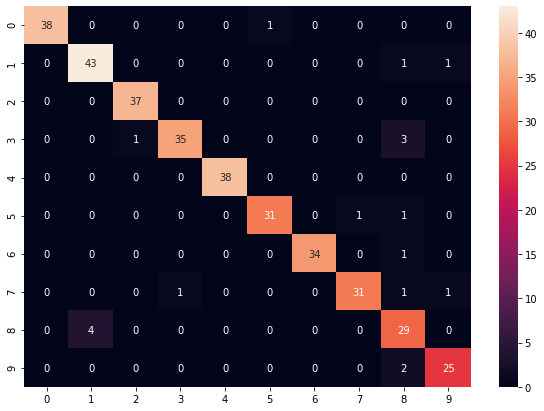

In [26]:
## PARA UNA MEJOR VISUALIZACION SE USA SEABRON
import seaborn as sns
figure = plt.figure(figsize=(10,7))
sns.heatmap(matriz, annot=True)

##### En este caso podemos hacer un analisis, dentro de la diagonal son los numeros que se pudo detectar de manera correcta, mientras que en el caso de cuatro color morado de la esquina inferior izquierda , encontramos que el modelo para el valor de 8 lo predijo 4 veces mal dandole el valor de 1 